<Figure size 432x288 with 0 Axes>

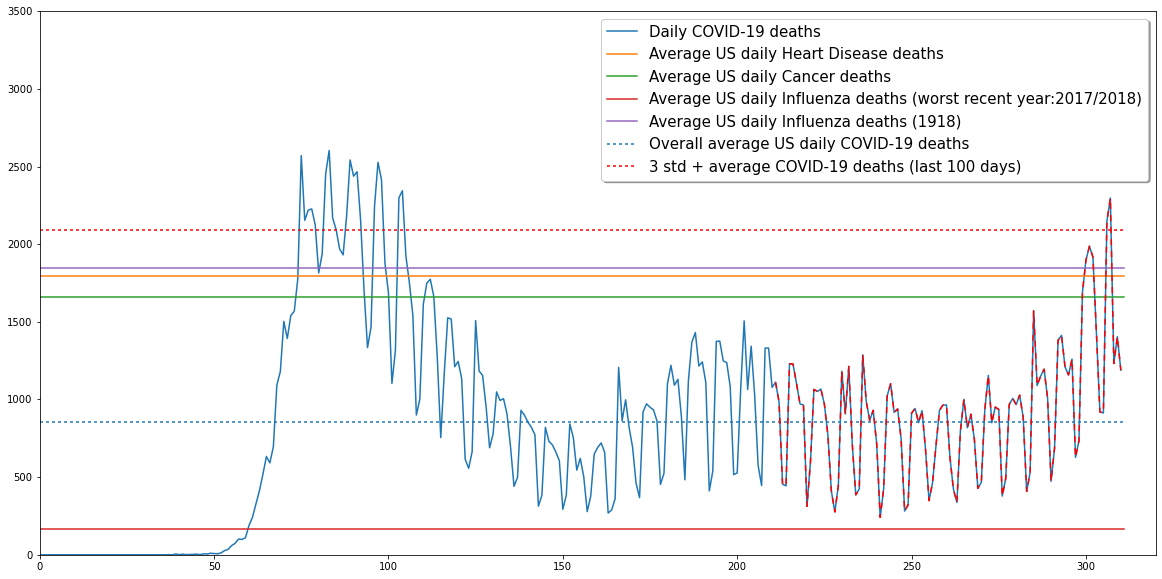

In [71]:
from numpy import diff, std
import matplotlib.pyplot as plt

def read_covid_data(data_type):
    if (data_type in ['confirmed', 'deaths', 'recovered']):
        COVID_directory = "/Users/kootsoop/git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
        first_row = None
        with open(COVID_directory + 'time_series_covid19_' + data_type + '_global.csv') as csvfile:
            confirmed = csv.reader(csvfile)
            for row in confirmed:
                if (first_row == None):
                    first_row = row
                if (row[1] == 'US'):
                    us_data = row
                    break
    else:
        raise Exception('Invalid data_type', data_type)
    return(first_row, us_data)

(first_row, confirmed) = read_covid_data('confirmed')
(first_row2, recovered) = read_covid_data('recovered')
(first_row3, deaths) = read_covid_data('deaths')

death_data = [(float(data)) for data in deaths[4:(len(first_row))]]
recovered_data = [(float(data)) for data in recovered[4:(len(first_row))]]
confirmed_data = [(float(data)) for data in confirmed[4:(len(first_row))]]
first_row_shifted = [ data for data in first_row[4:(len(first_row))]]

diff_death_data = diff(death_data)
length_death_data = len(diff_death_data)

plt.figure(1)
plt.figure(figsize=(20,10))
plt.plot(diff_death_data, label='Daily COVID-19 deaths')
# https://www.cdc.gov/heartdisease/facts.htm
plt.plot([0, len(diff_death_data)],[655000.0/365.0,655000.0/365.0], label='Average US daily Heart Disease deaths')
# https://cancerstatisticscenter.cancer.org/#!/
plt.plot([0, len(diff_death_data)],[606520.0/365.0,606520.0/365.0], label='Average US daily Cancer deaths')
# https://www.cdc.gov/flu/about/burden/past-seasons.html
plt.plot([0, len(diff_death_data)],[61000/365.0,61000/365.0], label='Average US daily Influenza deaths (worst recent year:2017/2018)')
# https://www.cdc.gov/flu/pandemic-resources/1918-commemoration/1918-pandemic-history.htm#:~:text=The%20number%20of%20deaths%20was,and%2065%20years%20and%20older.
plt.plot([0, len(diff_death_data)],[675000/365.0,675000/365.0], label='Average US daily Influenza deaths (1918)')
covid_average = death_data[len(death_data)-1]/len(death_data)
plt.plot([0, len(diff_death_data)],[covid_average,covid_average], color='#1f77b4', dashes=[2,2], label='Overall average US daily COVID-19 deaths')
covid_average_100 = (death_data[len(death_data)-1] - death_data[len(death_data)-101])/100
covid_std_upper = covid_average + 3*std(diff(death_data[len(death_data)-100:len(death_data)]))
plt.plot([0, len(diff(death_data))],[covid_std_upper,covid_std_upper], color='#ff0000', dashes=[2,2], label='3 std + average COVID-19 deaths (last 100 days)')


plt.plot(range(length_death_data-100, length_death_data), diff_death_data[range(length_death_data-100, length_death_data)], color="red",dashes=[4,4])
plt.ylim(0,3500)
plt.xlim(0,320)

ax = plt.gca()
ax.legend(loc='upper right', shadow=True, fontsize=15)

<Figure size 432x288 with 0 Axes>

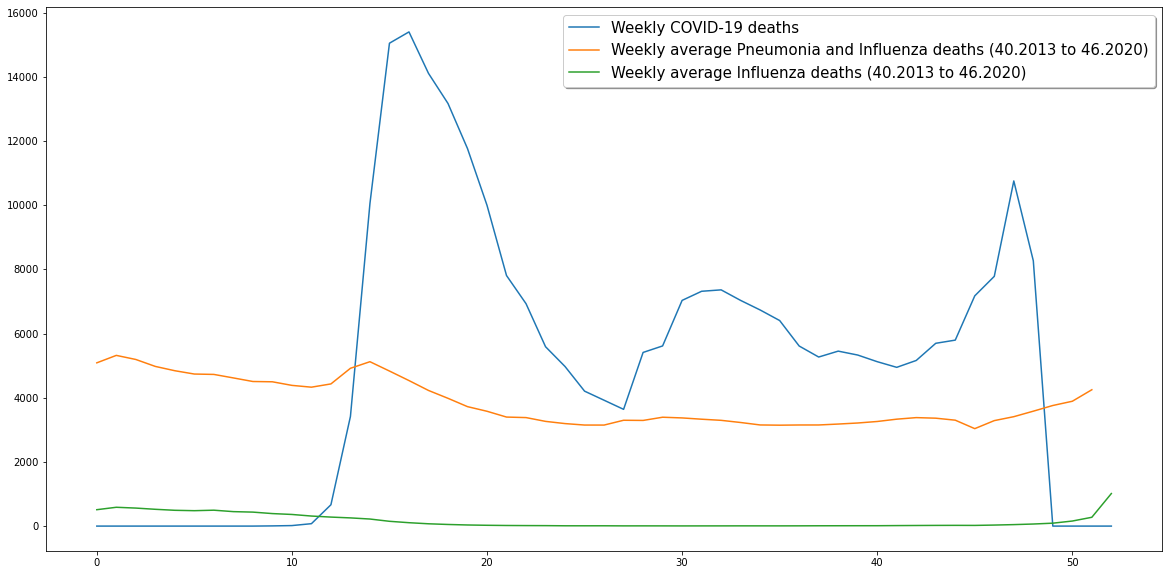

In [55]:
# Attempt to accumulate data by week of year.
from datetime import datetime
from numpy import zeros

weekly_deaths = zeros(53)
daily_deaths = diff(death_data)

for index in range(len(daily_deaths)):
    date_string = first_row_shifted[index]
    week_of_year = datetime.strptime(date_string, "%m/%d/%y").strftime("%V")
    weekly_deaths[int(week_of_year)] += daily_deaths[index]

    plt.figure(1)
plt.figure(figsize=(20,10))
plt.plot(weekly_deaths,label="Weekly COVID-19 deaths")
plt.plot(PI, label="Weekly average Pneumonia and Influenza deaths (40.2013 to 46.2020)")
plt.plot(Influenza, label="Weekly average Influenza deaths (40.2013 to 46.2020)")

ax = plt.gca()
ax.legend(loc='upper right', shadow=True, fontsize=15)

In [49]:
PI =[
5087.142857,
5319.142857,
5191.857143,
4975.285714,
4841.142857,
4738,
4726.142857,
4616.857143,
4505.571429,
4496.428571,
4384.714286,
4328.571429,
4430.142857,
4917.428571,
5122.285714,
4831.428571,
4534.714286,
4226.857143,
3981.571429,
3722,
3578,
3397.285714,
3381,
3262.857143,
3194,
3148.571429,
3147.857143,
3297.714286,
3292.428571,
3392.285714,
3370.428571,
3330.571429,
3295.285714,
3227.857143,
3151.428571,
3144.428571,
3150.571429,
3150.857143,
3179.571429,
3212.375,
3259.5,
3331.75,
3380.125,
3362.375,
3300.25,
3036.375,
3286.857143,
3409.285714,
3580.571429,
3757.714286,
3890.142857,
4248.857143]
Influenza = [
    511,
586.2857143,
561.2857143,
523.2857143,
492.1428571,
480.1428571,
495.2857143,
450.5714286,
435.5714286,
389.8571429,
362.4285714,
313,
280.5714286,
255.2857143,
220,
149.2857143,
105.7142857,
71.85714286,
50.57142857,
34.57142857,
25.14285714,
18.85714286,
15.85714286,
14.14285714,
9.428571429,
9.142857143,
9.571428571,
6.714285714,
7.142857143,
6.428571429,
5.428571429,
6.142857143,
6.428571429,
7.428571429,
7.142857143,
6.857142857,
8,
9.857142857,
10.71428571,
11.5,
11.875,
15.75,
18.625,
21.5,
22.875,
21.25,
32,
46,
64.57142857,
90.85714286,
157.4285714,
274.5714286,
1014
]